In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from glob import glob
from PIL import Image

C:\Users\Amy\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# get the image path

cwd = os.getcwd()

base_skin_dir = os.path.join('..', 'input')

# merge images: 2 zip files -> one directory

#imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     #for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}
    
    
image_path = os.path.join(cwd, 'HAM10000_images')
list_of_file_paths = glob(os.path.join(image_path, '*.jpeg'))


image_dict = dict()
for x in glob(os.path.join(image_path, '*.jpg')):
    image_dict.update( {os.path.splitext(os.path.basename(x))[0] : x} )
    
#input_image_dict = dict()
#for x in glob(os.path.join(image_path, '*.jpg')):
    #input_image_dict.update( {os.path.splitext(os.path.basename(x))[0] : os.path.join(base_skin_dir, 'HAM10000_images', x, '.jpg') })

#input_image_dict
#os.path.join(base_skin_dir, 'HAM10000_images', '.jpg')
image_dict

{'ISIC_0024306': 'C:\\Users\\Amy\\Dropbox\\2019 Spring\\Python\\HAM10000_images\\ISIC_0024306.jpg',
 'ISIC_0024307': 'C:\\Users\\Amy\\Dropbox\\2019 Spring\\Python\\HAM10000_images\\ISIC_0024307.jpg',
 'ISIC_0024308': 'C:\\Users\\Amy\\Dropbox\\2019 Spring\\Python\\HAM10000_images\\ISIC_0024308.jpg',
 'ISIC_0024309': 'C:\\Users\\Amy\\Dropbox\\2019 Spring\\Python\\HAM10000_images\\ISIC_0024309.jpg',
 'ISIC_0024310': 'C:\\Users\\Amy\\Dropbox\\2019 Spring\\Python\\HAM10000_images\\ISIC_0024310.jpg',
 'ISIC_0024311': 'C:\\Users\\Amy\\Dropbox\\2019 Spring\\Python\\HAM10000_images\\ISIC_0024311.jpg',
 'ISIC_0024312': 'C:\\Users\\Amy\\Dropbox\\2019 Spring\\Python\\HAM10000_images\\ISIC_0024312.jpg',
 'ISIC_0024313': 'C:\\Users\\Amy\\Dropbox\\2019 Spring\\Python\\HAM10000_images\\ISIC_0024313.jpg',
 'ISIC_0024314': 'C:\\Users\\Amy\\Dropbox\\2019 Spring\\Python\\HAM10000_images\\ISIC_0024314.jpg',
 'ISIC_0024315': 'C:\\Users\\Amy\\Dropbox\\2019 Spring\\Python\\HAM10000_images\\ISIC_0024315.jpg',


In [3]:
# dictionary for 7 classes

skinlesiontype_dict = {
    'akiec': 'Actinic keratosis',
    'bcc': 'Basal cell carcinoma',
    'bkl': 'Benign keratosis',
    'df': 'Dermatofibroma',
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'vasc': 'Vascular skin lesion'
}
skinlesiontype_dict

skinlesiontype_dict.update({'testkey':'testvalue'})
skinlesiontype_dict

{'akiec': 'Actinic keratosis',
 'bcc': 'Basal cell carcinoma',
 'bkl': 'Benign keratosis',
 'df': 'Dermatofibroma',
 'mel': 'Melanoma',
 'nv': 'Melanocytic nevi',
 'testkey': 'testvalue',
 'vasc': 'Vascular skin lesion'}

In [4]:
# read the metadata csv file

metadata_file = pd.read_csv(os.path.join(cwd, 'HAM10000_metadata.csv'))


In [5]:
# make columns

# add column called path that has the image file path
metadata_file['path'] = metadata_file['image_id'].map(image_dict.get)

# add column called cell_type with the class name
metadata_file['cell_type'] = metadata_file['dx'].map(skinlesiontype_dict.get)

# add column called cell_type_idx with the clas number (0,1,2,3,4,5,6)
metadata_file['cell_type_idx'] = pd.Categorical(metadata_file['cell_type']).codes

# sample 5 rows
metadata_file.sample(5)


,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
2416,HAM_0000460,ISIC_0025197,vasc,consensus,50.0,female,abdomen,C:\Users\Amy\Dropbox\2019 Spring\Python\HAM100...,Vascular skin lesion,6
4274,HAM_0006383,ISIC_0025183,nv,follow_up,75.0,female,trunk,C:\Users\Amy\Dropbox\2019 Spring\Python\HAM100...,Melanocytic nevi,4
3041,HAM_0003711,ISIC_0024896,nv,follow_up,45.0,male,foot,C:\Users\Amy\Dropbox\2019 Spring\Python\HAM100...,Melanocytic nevi,4
8339,HAM_0002216,ISIC_0026305,nv,histo,60.0,male,back,C:\Users\Amy\Dropbox\2019 Spring\Python\HAM100...,Melanocytic nevi,4
9096,HAM_0001730,ISIC_0030856,nv,histo,65.0,female,back,C:\Users\Amy\Dropbox\2019 Spring\Python\HAM100...,Melanocytic nevi,4


In [6]:
# get data info

metadata_file.describe(exclude = [np.number])

,lesion_id,image_id,dx,dx_type,sex,localization,path,cell_type
count,10015,10015,10015,10015,10015,10015,10014,10015
unique,7470,10015,7,4,3,15,10014,7
top,HAM_0000835,ISIC_0028188,nv,histo,male,back,C:\Users\Amy\Dropbox\2019 Spring\Python\HAM100...,Melanocytic nevi
freq,6,1,6705,5340,5406,2192,1,6705


In [7]:
# print the types

print(metadata_file.dtypes)

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
path              object
cell_type         object
cell_type_idx       int8
dtype: object


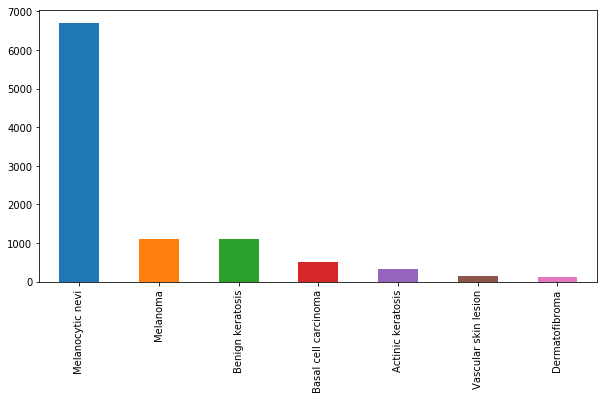

In [8]:
# plot distribution of the 7 classes

fig, ax1 = plt.subplots(1,1,figsize = (10,5))
metadata_file['cell_type'].value_counts().plot(kind = 'bar', ax = ax1)

In [9]:
# load the images into the columns from the image path to the image folder

#metadata_file['image'] = metadata_file['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

for xx in glob(os.path.join(image_path, '*.jpg')):
    img = Image.open(xx)
    img.load
    imgnp = np.asarray(img)
    #img.resize((100,75))
    metadata_file['image'] = imgnp
    
metadata_file.sample(5)
#len(imgnp), len(imgnp[0])

ValueError: Length of values does not match length of index

In [10]:
imgnp = np.asarray(img)
imgnp
imgnp, len(imgnp), len(imgnp[0])

(array([[[221, 131, 131],
         [222, 128, 126],
         [223, 129, 127],
         ...,
         [229, 134, 138],
         [226, 136, 138],
         [230, 135, 139]],
 
        [[223, 129, 129],
         [225, 130, 126],
         [228, 132, 133],
         ...,
         [225, 135, 137],
         [226, 136, 136],
         [226, 134, 135]],
 
        [[222, 128, 126],
         [229, 129, 131],
         [231, 130, 134],
         ...,
         [224, 136, 132],
         [227, 136, 133],
         [228, 137, 134]],
 
        ...,
 
        [[209, 118, 125],
         [210, 119, 126],
         [212, 121, 126],
         ...,
         [210, 140, 128],
         [209, 141, 130],
         [207, 139, 128]],
 
        [[205, 116, 118],
         [208, 119, 121],
         [209, 120, 124],
         ...,
         [210, 142, 129],
         [212, 144, 131],
         [211, 143, 130]],
 
        [[207, 116, 115],
         [209, 120, 116],
         [208, 120, 118],
         ...,
         [208, 143, 125],
  

In [11]:
metadata_file['testingimages'] = metadata_file['path'].map(lambda x: np.asarray(Image.open(x)))

AttributeError: 'NoneType' object has no attribute 'read'